In [2]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv("/content/Mall_Customers.csv")

### **Exploratory Data Analysis (EDA)**

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

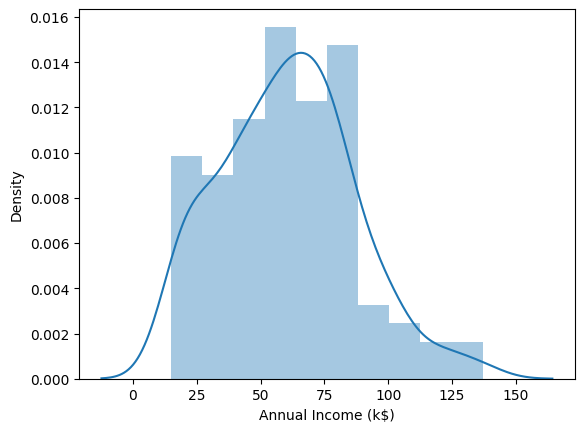

In [11]:
sns.distplot(df['Annual Income (k$)'])

In [12]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [13]:
my_cols = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

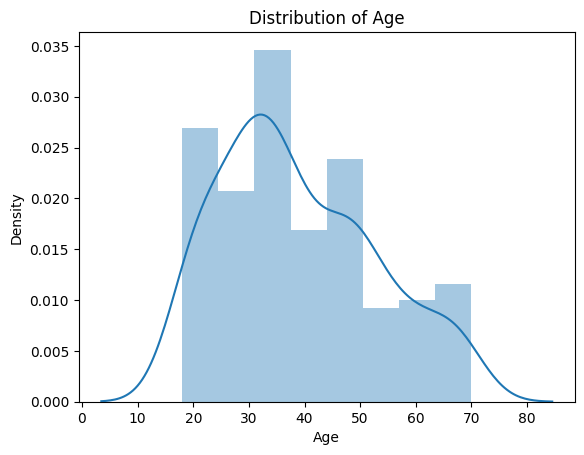

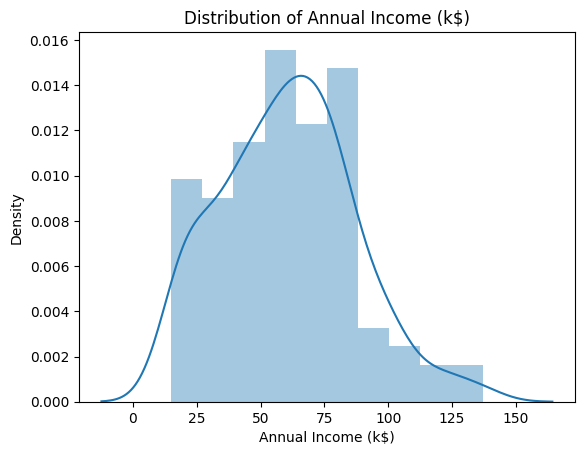

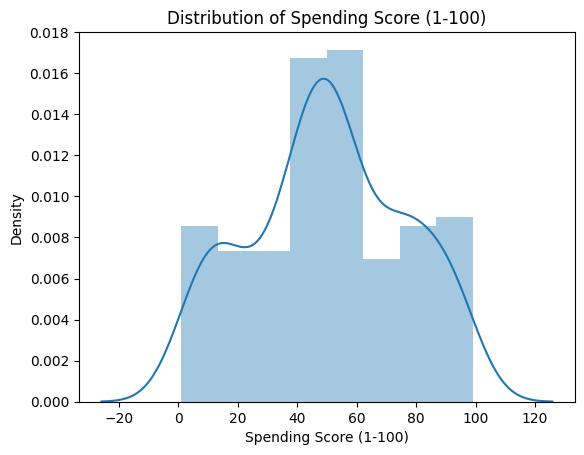

In [14]:
for i in my_cols:
    plt.figure()
    sns.distplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.show()


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

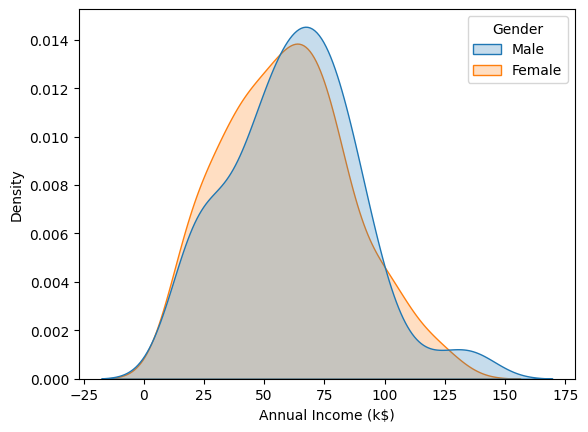

In [15]:
sns.kdeplot(data=df, x=df['Annual Income (k$)'], hue='Gender', shade=True, common_norm=False)

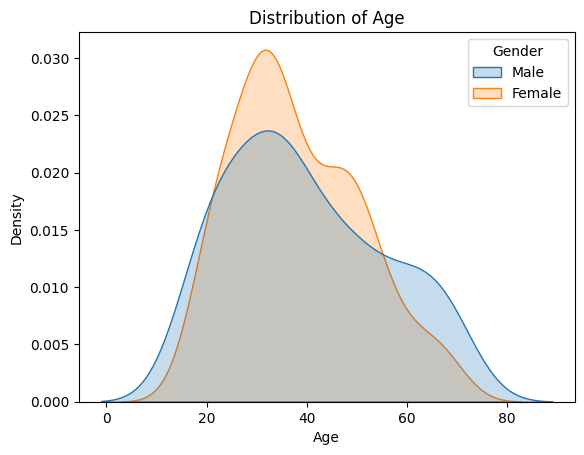

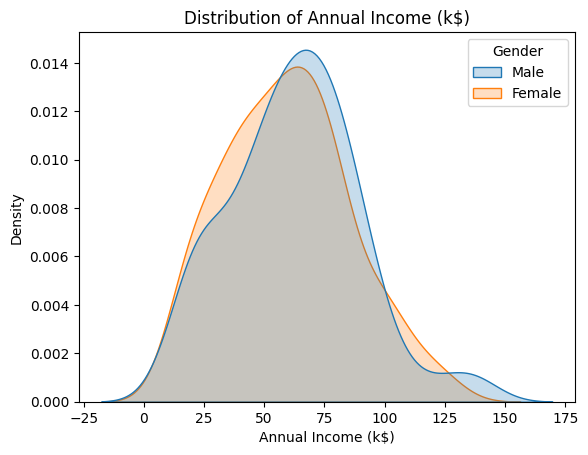

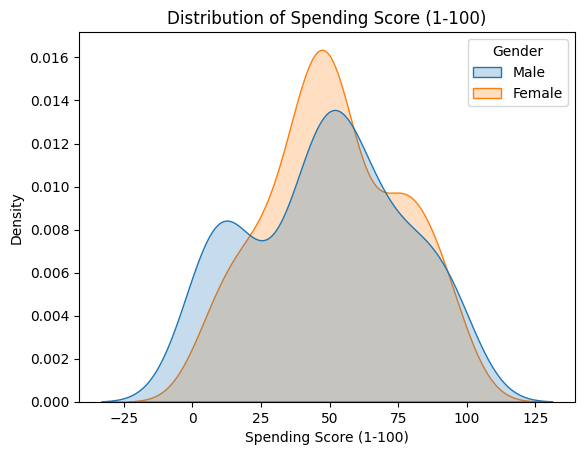

In [16]:
for col in my_cols:
    sns.kdeplot(data = df, x = df[col], shade=True, hue=df.Gender, common_norm=False)
    plt.title(f'Distribution of {col}')
    plt.show()

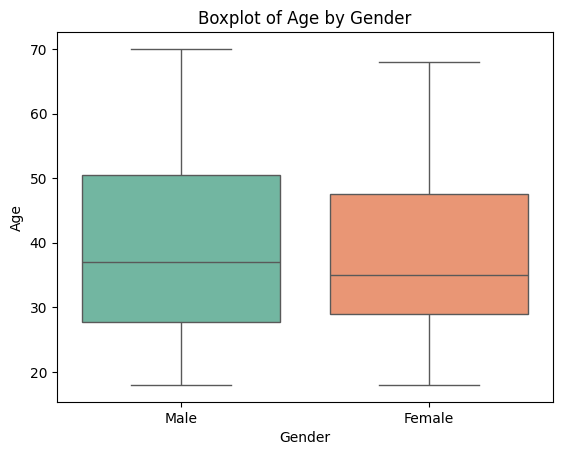

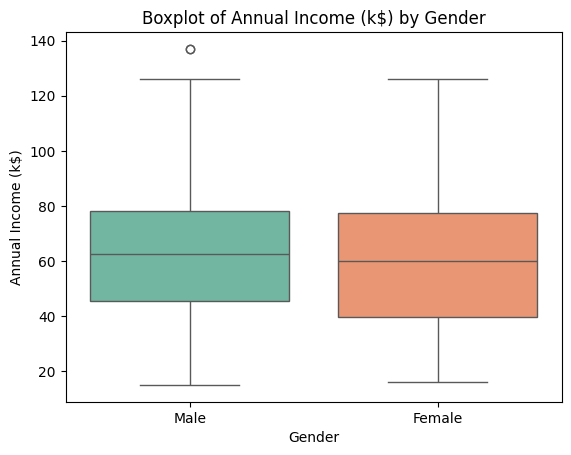

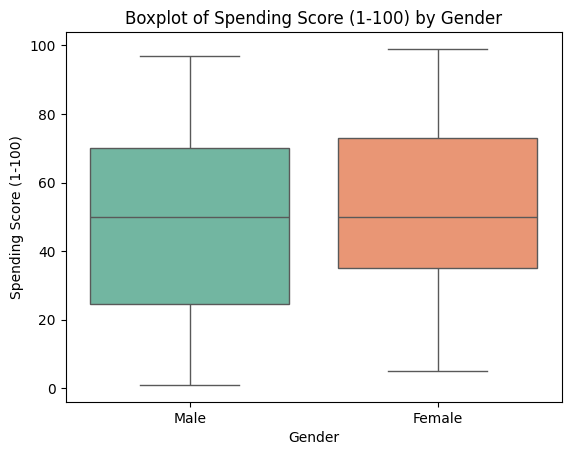

In [17]:
for i in my_cols:
  plt.figure()
  sns.boxplot(x= df.Gender, y=df[i], palette='Set2')
  plt.title(f'Boxplot of {i} by Gender')


### **BIVARIATE ANALYSIS**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

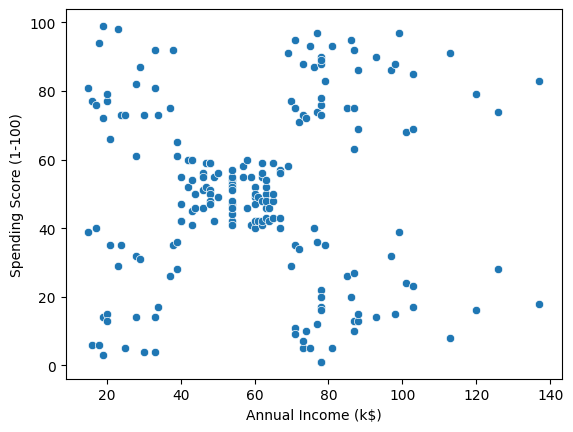

In [18]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

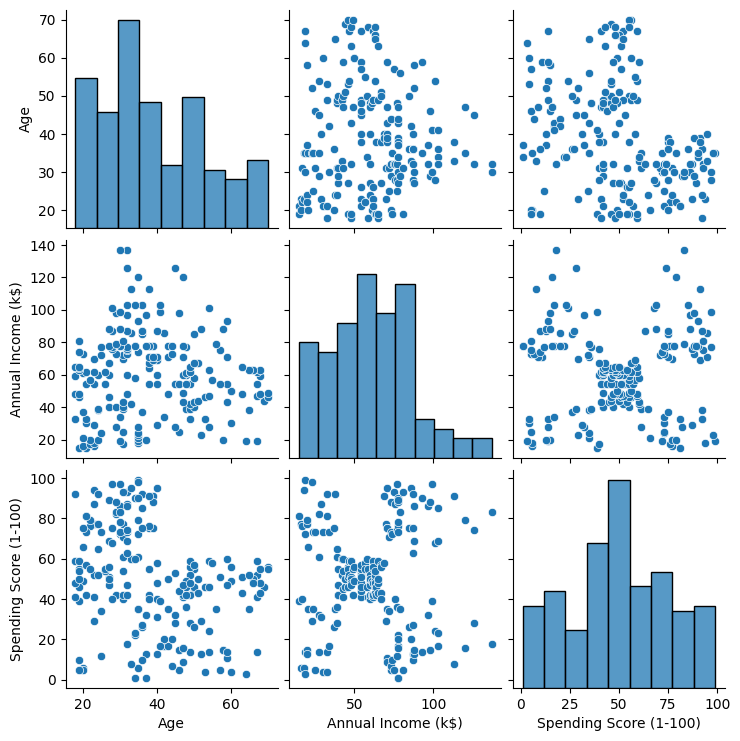

In [19]:
new_df = df.drop('CustomerID', axis=1)
sns.pairplot(new_df)

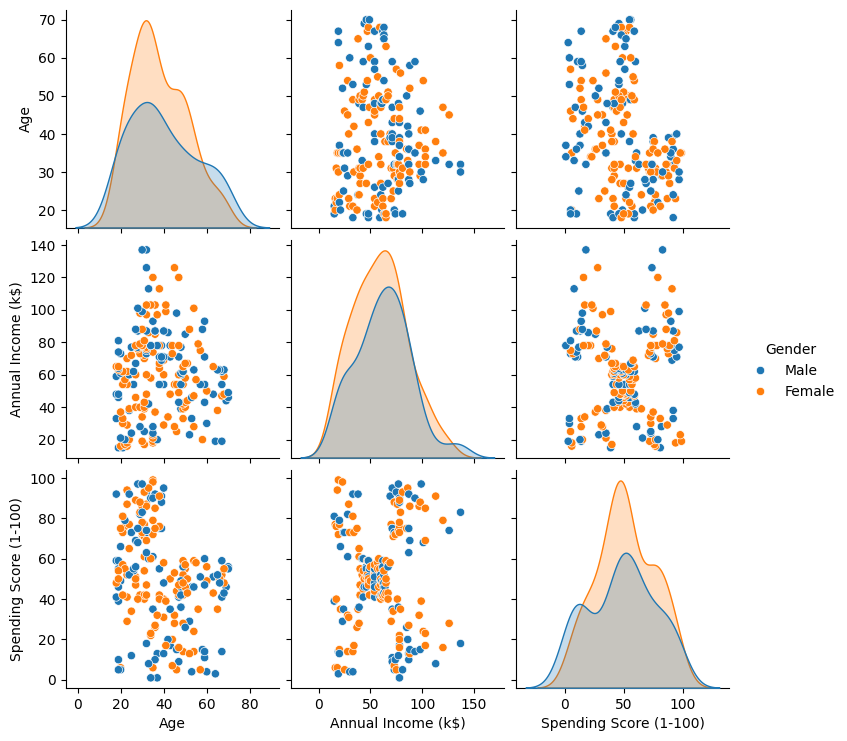

In [20]:
new_df = df.drop('CustomerID', axis=1)
sns.pairplot(new_df, hue='Gender')

In [21]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [22]:
cor_df = new_df.drop('Gender', axis = 1)
cor_df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

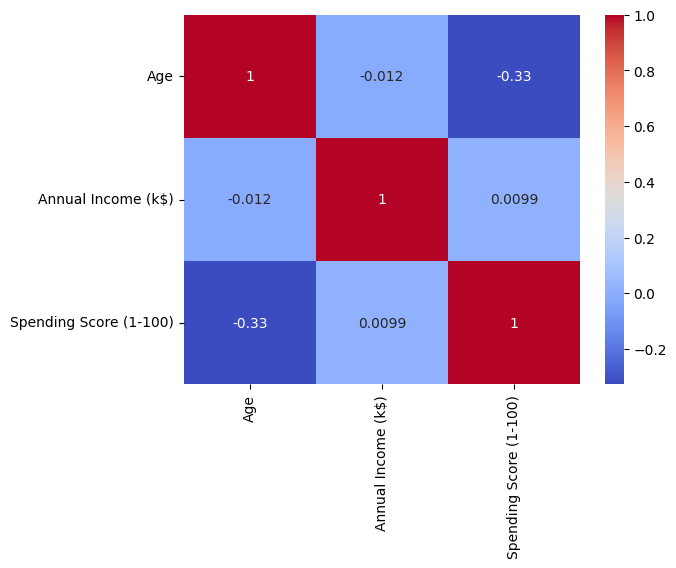

In [23]:
sns.heatmap(cor_df.corr(),annot=True,cmap='coolwarm')

### **Finding the Optimal Number of Clusters**

In [24]:
X = df[['Annual Income (k$)']]
X.head()

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17


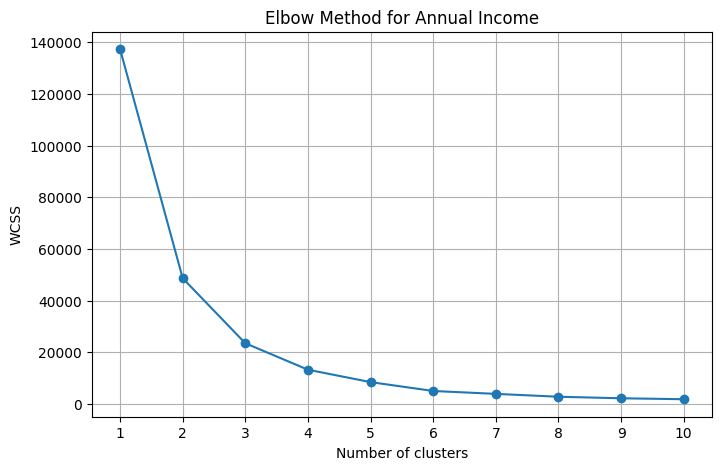

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Annual Income')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



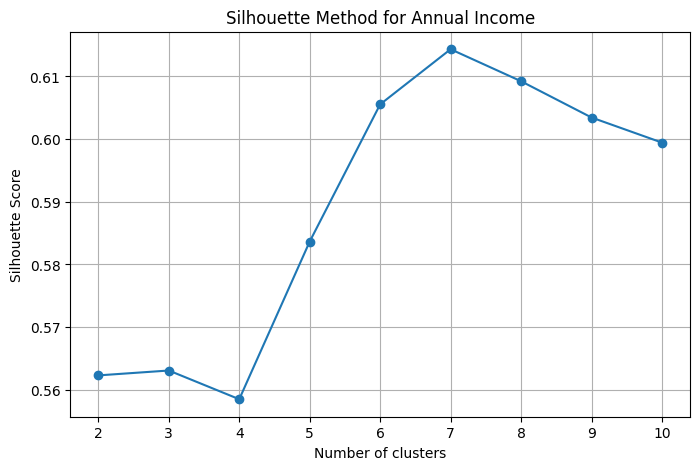

In [26]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Annual Income')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


### **UNIVARIATE CLUSTERING**

In [27]:
univariate_clustering = KMeans(n_clusters=3)
univariate_clustering.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [28]:
univariate_clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [29]:
df['Income Cluster'] = univariate_clustering.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [30]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


### **BIVARIATE CLUSTERING**

In [31]:
bivariate_clustering= KMeans(n_clusters=5)
bivariate_clustering.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = bivariate_clustering.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,3


In [32]:
centers =pd.DataFrame(bivariate_clustering.cluster_centers_)
centers.columns = ['x','y']

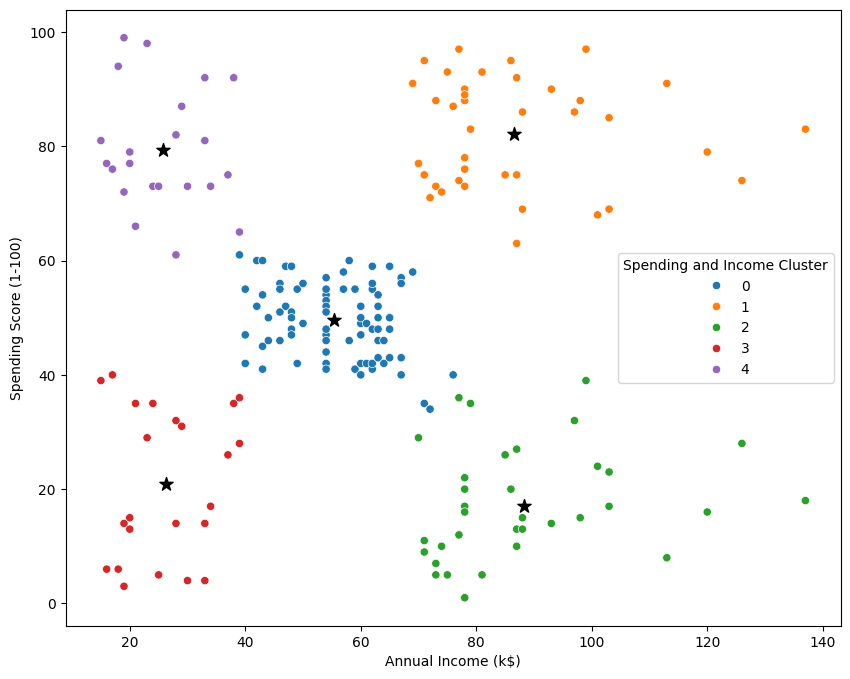

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [34]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.608696,0.391304
4,0.590909,0.409091


In [35]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [56]:
scale = StandardScaler()

In [57]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df_encoded['Gender_Male'] = df_encoded['Gender_Male'].astype(int)

In [58]:
df_encoded= df_encoded.drop(columns=['CustomerID','Income Cluster',	'Spending and Income Cluster'])

In [59]:
df_encoded

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [62]:
X_scaled = scale.fit_transform(df_encoded)

In [72]:
scale = StandardScaler()
X_scaled = scale.fit_transform(df_encoded)

optimal_clusters = 6

kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_optimal.fit(X_scaled)


KMeans(n_clusters=6, n_init=10, random_state=42)

In [71]:
df_encoded['Cluster'] = kmeans_optimal.labels_

In [74]:
df_encoded.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,0,2
3,23,16,77,0,2
4,31,17,40,0,2


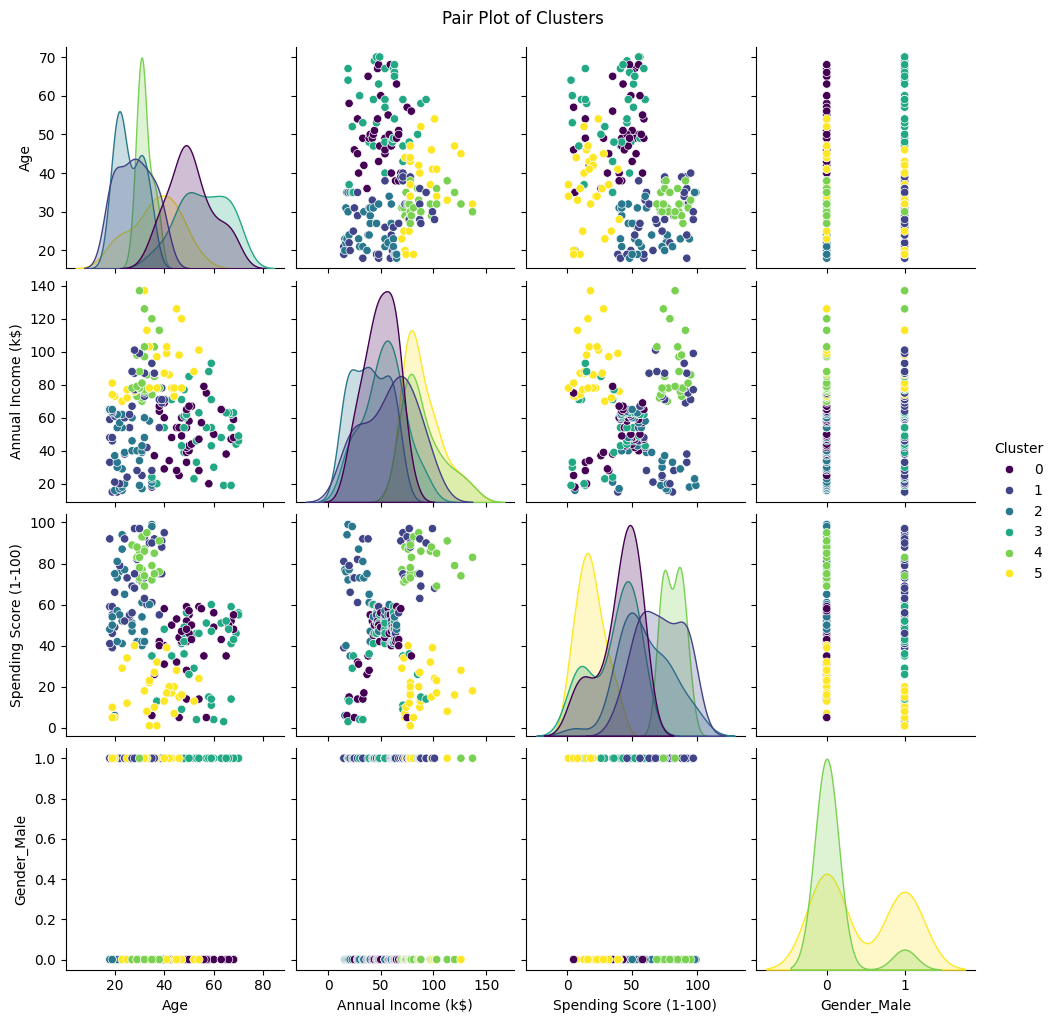

In [75]:
sns.pairplot(df_encoded, hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()

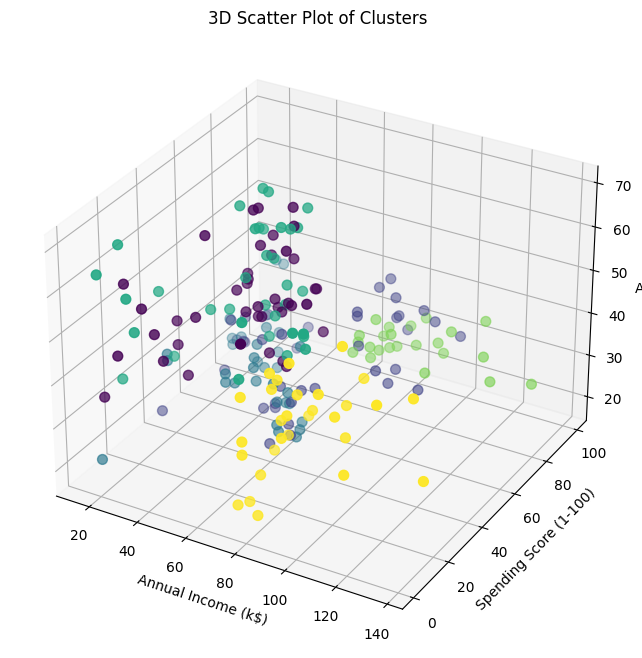

In [76]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_encoded['Annual Income (k$)'], df_encoded['Spending Score (1-100)'], df_encoded['Age'],
           c=df_encoded['Cluster'], cmap='viridis', marker='o', s=50)

ax.set_title('3D Scatter Plot of Clusters')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.show()
